# Kalman filter test sheet


## Prep and examples

In [67]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
path="/its/home/drs25/Documents/GitHub/TactileSensor/Code/Data collection/robot/"
if sys.platform.startswith('win'):
    path="C:/Users/dexte/Documents/GitHub/TactileSensor/Code/Data collection/robot/"
def sort_data(name,vibration=True,dir="all"):
    df = pd.read_csv(path+name)
    df=pd.DataFrame(df).fillna(0)
    sensors=[df['x'],df['y'],df['z']]+[df['s'+str(i+1)] for i in range(6)]
    return np.array(sensors).T

Estimated States: [[1.         2.        ]
 [1.07683284 2.03841642]
 [1.18225647 2.09112824]
 [1.21744365 2.15354872]
 [1.35503253 2.25233064]]
Sensor Values: [1, 1.2, 1.4, 1.3, 1.7]


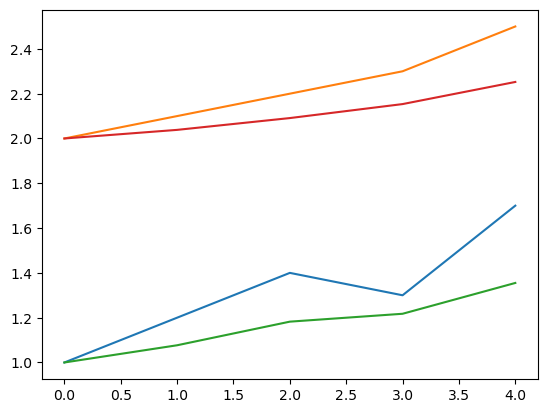

In [34]:
def multi_sensor_kalman_filter(sensor_values_list):
    dim_x = len(sensor_values_list)  # Number of sensors
    num_samples = len(sensor_values_list[0])  # Number of samples (assuming same for all sensors)
    
    # Initialize Kalman filter for multi-sensor fusion
    kf = KalmanFilter(dim_x=dim_x, dim_z=dim_x)  # Update dimension to match the number of sensors

    # Initial state estimate (each sensor's first measurement as initial state)
    initial_state_estimate = np.array([sensor_values_list[i][0] for i in range(dim_x)])
    kf.x = initial_state_estimate.reshape((dim_x, 1))

    # Initial uncertainty (covariance matrix)
    initial_uncertainty = 1
    kf.P *= np.eye(dim_x) * initial_uncertainty

    # Define the state transition matrix (assuming no changes in the state)
    kf.F = np.eye(dim_x)

    # Define the measurement function matrix
    kf.H = np.eye(dim_x)

    # Measurement noise covariance
    measurement_noise = 1
    kf.R *= np.eye(dim_x) * measurement_noise  # Update measurement noise covariance to match sensor count

    # Process noise covariance
    process_noise = 0.1
    kf.Q *= np.eye(dim_x) * process_noise

    # Kalman filter processing
    filtered_states = []
    for measurements in zip(*sensor_values_list):
        measurements = np.array(measurements).reshape((dim_x, 1))
        kf.predict()  # Predict the next state
        kf.update(measurements)  # Update the state based on measurements
        filtered_states.append(kf.x.flatten())  # Store the estimated state

    return np.array(filtered_states)


# Example usage:
sensor_values_1 = [1, 1.2, 1.4, 1.3, 1.7]  # Replace with sensor 1 values
sensor_values_2 = [2, 2.1, 2.2, 2.3, 2.5]  # Replace with sensor 2 values
# ... (sensor_values_N)  # Add data for other sensors if available

estimated_states = multi_sensor_kalman_filter([sensor_values_1, sensor_values_2])
print("Estimated States:", estimated_states)
print("Sensor Values:", sensor_values_1)

plt.plot(sensor_values_1)
plt.plot(sensor_values_2)
plt.plot(estimated_states)
plt.show()

(100, 2)


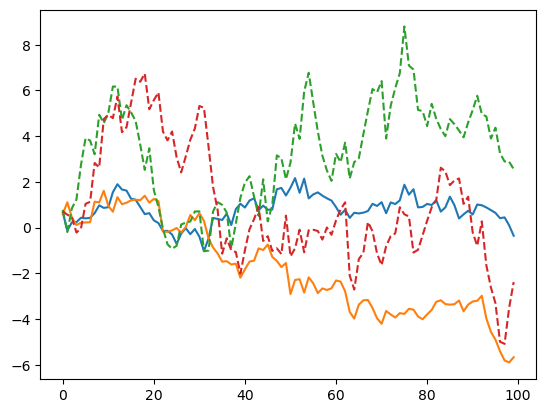

In [55]:
sensor_values = np.random.rand(2,10)  # Replace with your sensor values
bigar=[]
noise=[]
for i in range(100):
    estimated_states = multi_sensor_kalman_filter(sensor_values)
    bigar.append(estimated_states.T[:,-1].copy())
    noise.append(sensor_values[:,-1].copy())
    sensor_values+=np.random.normal(0,1,sensor_values.shape) #change over time
bigar=np.array(bigar)
noise=np.array(noise)
print(bigar.shape)
plt.plot(bigar)
plt.plot(noise,"--")
plt.show()


## Real data

In [68]:
X=sort_data("accmovementLeftFoot.csv")
X1=sort_data("accmovementRightFoot.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootCarpet.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootCarpet.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootConrete.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootConrete.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootOutdoor.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootOutdoor.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootCarpetDay2.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootCarpetDay2.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootCarpetDay3.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootCarpetDay3.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementLeftFootDay4.csv")
X=np.concatenate((X,X1),axis=0)
X1=sort_data("accmovementRightFootDay4.csv")
X=np.concatenate((X,X1),axis=0)


#### Filtering real data

(90, 9)


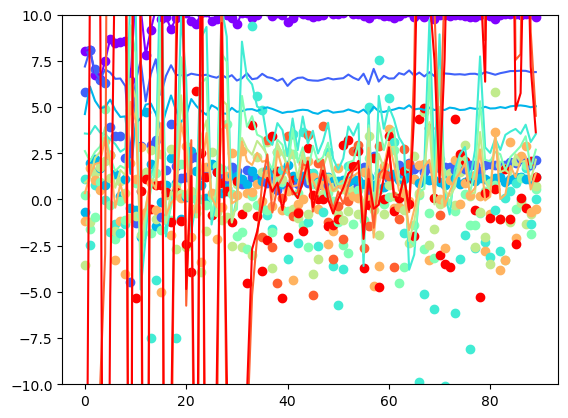

In [97]:
X.shape
sample_x=X[0:100]
size=10
vals=[]
colours = plt.cm.rainbow(np.linspace(0, 1, 9))  # Use a colormap for different colors

for i in range(len(sample_x)-size): #main loop to make rotation
    window=sample_x[i:i+size]
    filtered=multi_sensor_kalman_filter(window)
    last_value=filtered.T[-1]
    vals.append(last_value)
    last_noisy_value=window[-1]
    for j in range(len(last_noisy_value)): #plot noisy points
        plt.scatter(i,last_noisy_value[j],color=colours[j])

vals=np.array(vals)
print(vals.shape)
for j in range(len(last_value)):
    plt.plot(vals.T[j],color=colours[j])
plt.ylim([-10,10])
plt.show()



In [96]:
#denoised dataset creation
vals=[]
sample_x=X.copy()
size=50
for i in range(len(sample_x)-size): #main loop to make rotation
    window=sample_x[i:i+size]
    filtered=multi_sensor_kalman_filter(window)
    last_value=filtered.T[-1]
    vals.append(last_value)
    last_noisy_value=window[-1]

vals=np.array(vals)
print(vals.shape)
np.save("kalman_foot_data",vals)

(104553, 9)
